# US_real_estate_market_visualization
*by Bingkun (Mason) Ma*

## Overview

This porject will show the housing market trends of the United States. The dataset will be used is the state level of Inventory-monthly historical data from Realtor.com(https://www.realtor.com/research/data/). Tha period of data is from June 2016 to Sepember 2021.

## Prepare imports and data

In [1]:
import datetime
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv("RDC_Inventory_Core_Metrics_State_History.csv")
print('Dataset has ',df.shape[0],' records and ',df.shape[1], ' columns' )
print(' ')
df.head()

Dataset has  3214  records and  39  columns
 


,month_date_yyyymm,state,state_id,median_listing_price,median_listing_price_mm,median_listing_price_yy,active_listing_count,active_listing_count_mm,active_listing_count_yy,median_days_on_market,...,median_square_feet_yy,average_listing_price,average_listing_price_mm,average_listing_price_yy,total_listing_count,total_listing_count_mm,total_listing_count_yy,pending_ratio,pending_ratio_mm,pending_ratio_yy
0,202109,vermont,vt,359450.0,0.0270,0.1062,1569,-0.0694,-0.4034,58.5,...,-0.0185,5.600091e+05,0.0269,0.1331,2723,-0.0347,-0.3760,0.735500,0.0623,0.0762
1,202109,maine,me,336500.0,0.0045,0.1282,3533,-0.0444,-0.2593,47.5,...,-0.0168,4.908362e+05,-0.0012,0.0828,5002,-0.0265,-0.2144,0.415794,0.0260,0.0810
2,202109,wisconsin,wi,275000.0,-0.0175,0.0389,11254,0.0303,-0.1324,43.0,...,-0.0466,3.643334e+05,-0.0168,0.0304,20466,0.0000,-0.1216,0.818553,-0.0552,0.0224
3,202109,connecticut,ct,459250.0,-0.0212,0.1901,7719,-0.0283,-0.5209,49.5,...,-0.0791,1.060586e+06,-0.0083,0.3065,17277,-0.0426,0.0616,1.238243,-0.0334,1.2281
4,202109,new york,ny,574000.0,0.0088,0.0132,59417,0.0007,-0.1397,70.0,...,-0.0857,1.347206e+06,0.0193,0.1469,96447,0.0016,-0.1506,0.623222,0.0014,-0.0208


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3214 entries, 0 to 3213
Data columns (total 39 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   month_date_yyyymm                        3214 non-null   int64  
 1   state                                    3214 non-null   object 
 2   state_id                                 3214 non-null   object 
 3   median_listing_price                     3214 non-null   float64
 4   median_listing_price_mm                  2601 non-null   float64
 5   median_listing_price_yy                  2601 non-null   float64
 6   active_listing_count                     3214 non-null   int64  
 7   active_listing_count_mm                  2601 non-null   float64
 8   active_listing_count_yy                  2601 non-null   float64
 9   median_days_on_market                    3214 non-null   float64
 10  median_days_on_market_mm                 2601 no

## Basic statistical information

In [4]:
df.describe()

,month_date_yyyymm,median_listing_price,median_listing_price_mm,median_listing_price_yy,active_listing_count,active_listing_count_mm,active_listing_count_yy,median_days_on_market,median_days_on_market_mm,median_days_on_market_yy,...,median_square_feet_yy,average_listing_price,average_listing_price_mm,average_listing_price_yy,total_listing_count,total_listing_count_mm,total_listing_count_yy,pending_ratio,pending_ratio_mm,pending_ratio_yy
count,3214.000000,3214.000000,2601.000000,2601.000000,3214.000000,2601.000000,2601.000000,3214.000000,2601.000000,2601.000000,...,2585.000000,3.214000e+03,2601.000000,2601.000000,3214.000000,2601.000000,2601.000000,3214.000000,2601.000000,2601.000000
mean,201868.486310,311785.179638,0.005117,0.069847,22278.833230,-0.012806,-0.162821,70.399969,0.000994,-0.088306,...,-0.002324,4.949739e+05,0.005537,0.081159,32033.053827,0.005131,-0.057601,0.492227,0.028961,0.232573
std,154.994032,122849.639837,0.021134,0.059163,25515.397664,0.071569,0.206036,24.597080,0.124374,0.161494,...,0.140172,2.680744e+05,0.024314,0.093002,37464.878615,0.097273,0.202133,0.489832,0.155776,0.410698
min,201607.000000,134250.000000,-0.104900,-0.227800,1.000000,-0.360200,-0.712600,7.000000,-0.508065,-0.712963,...,-1.000000,2.077657e+05,-0.120000,-0.217000,1.000000,-0.352300,-0.542400,0.000000,-0.725000,-0.845800
25%,201710.000000,225000.000000,-0.006200,0.034700,6150.250000,-0.058500,-0.295000,53.000000,-0.057692,-0.152941,...,-0.025400,2.995491e+05,-0.007200,0.030000,8869.000000,-0.037500,-0.167900,0.162522,-0.018100,0.006300
50%,201902.000000,282475.000000,0.000200,0.064500,13531.000000,-0.010400,-0.120600,67.000000,0.024876,-0.068182,...,0.000500,4.004671e+05,0.002400,0.061200,19977.500000,0.001200,-0.073100,0.331124,0.000300,0.064000
75%,202006.000000,359000.000000,0.015900,0.098900,27019.500000,0.028900,-0.031200,84.000000,0.084034,-0.011905,...,0.022100,5.993494e+05,0.016300,0.109700,37680.250000,0.041900,0.013800,0.644295,0.040900,0.350100
max,202109.000000,808908.000000,0.236400,0.378000,164441.000000,0.293300,0.844700,210.000000,0.347826,0.878788,...,3.000000,1.943105e+06,0.300500,0.795100,351391.000000,0.969600,1.770700,3.903721,2.403400,3.182600


## Visualizations

### Average listing price trend with time:

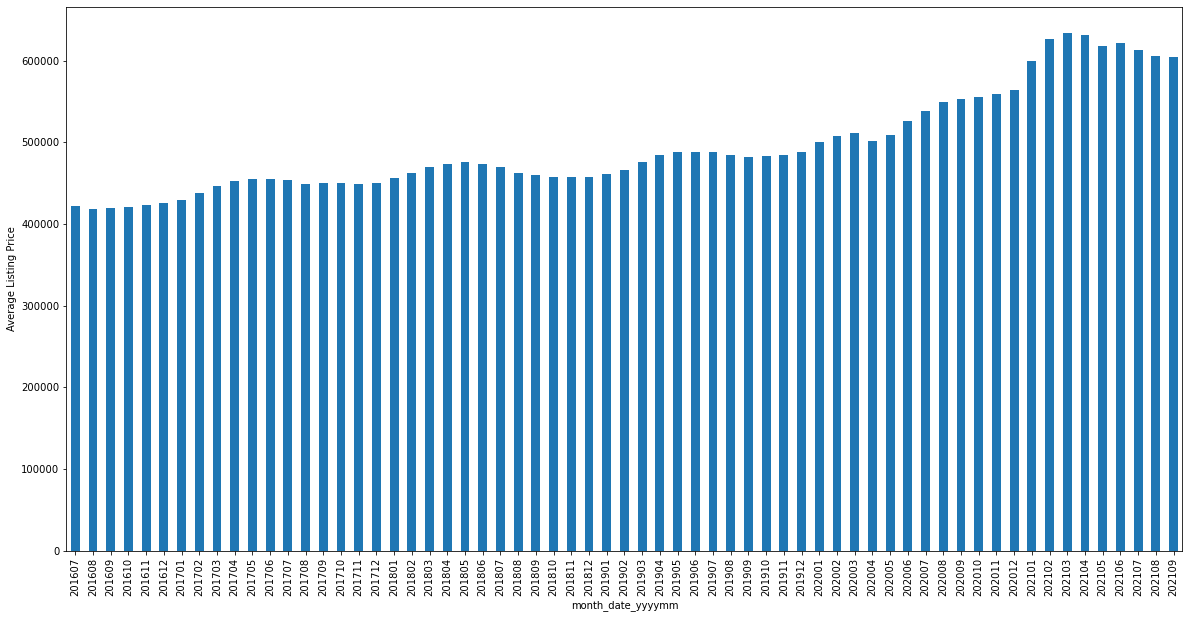

In [5]:
ax = df.groupby(['month_date_yyyymm'])['average_listing_price'].mean().plot(kind = 'bar', figsize = (20,10))
ax.set_ylabel("Average Listing Price")
plt.show()
plt.close()

With the fig above, the average listing price increased from July 2016 through September 2019. And during each year, the price started to increase from February to the peak which shows in the month of June. That makes the summer is the season with the most expensive average listing price during the whole year. In another word, cooling weather can mean a cooling real estate market. \
While the weather is something that will differ in each market, some nationwide considerations contribute to seasonal trends in real estate. The holiday season and school year both hugely influence the supply and demand of any given market.[1] \
In fact, 91% of home buyers with children consider school boundaries important to their home search. On top of that, 73% of home buyers, with or without children, say school boundaries are a large factor when it comes to home buying.[2]

### Price range by States:

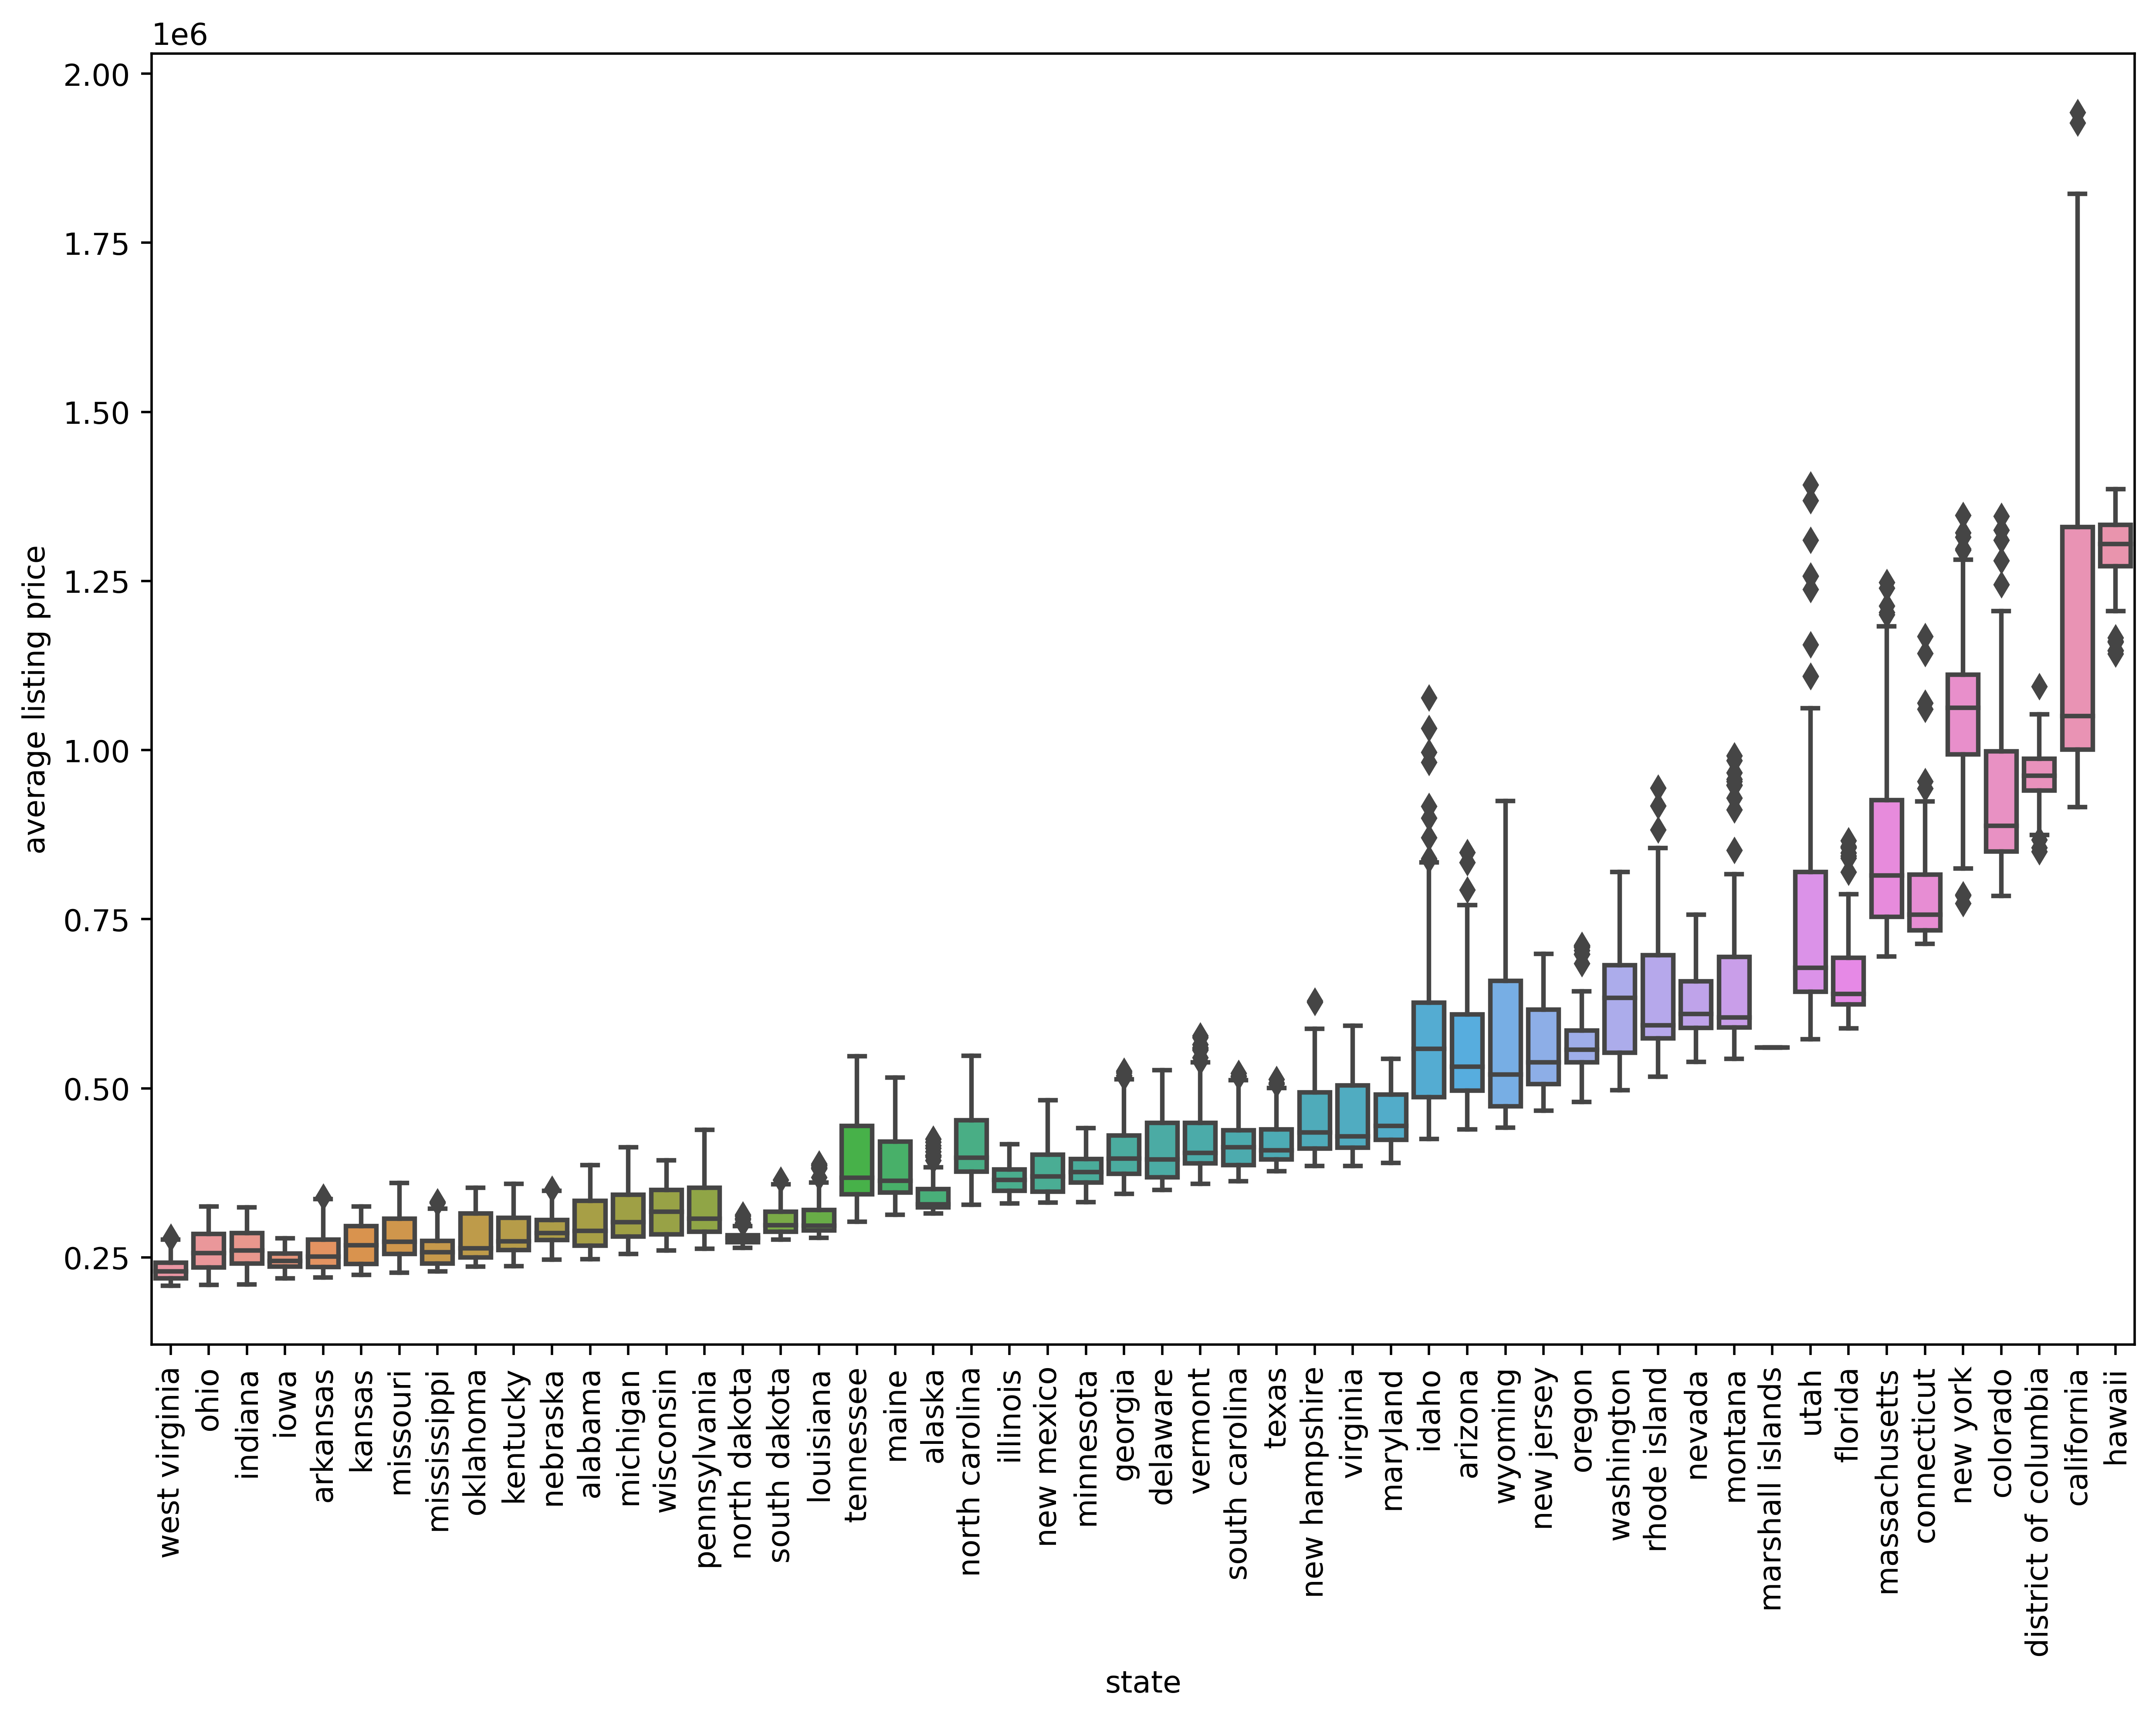

In [6]:
plt.figure(figsize=(10, 8), dpi=500)
box_plot = sns.boxplot(x = 'state',y = 'average_listing_price',data = df.sort_values('average_listing_price'))
plt.ylabel('average listing price')
plt.xlabel('state')
ax = box_plot.axes
lines = ax.get_lines()
categories = ax.get_xticks()
ax.tick_params(axis='x', rotation=90)
box_plot.figure.tight_layout()
fig = box_plot.get_figure()

From the fig above, the states with lower average listing price have smaller range of its average listing price. And the huge cities such as Los Angela and San Francisco can lead  a huge urban and rural differences then make their state have larger range of average listing price.

### Note and remaining questions:
1. I was thinking to use the zipcode level data for the project. However the github.com has a 25MB limitation for the file upload. So the state level data was the only option. The only way that I can do is spliting the CSV file to many for uploading. Is there any other way other than taht?
2. In the Average listing price trend with time part, I used mean. Which can make more sence, mean or median?

## Reference:

State level of Inventory-monthly historical data from Realtor.com(https://www.realtor.com/research/data/) \
[1]Seasons Impact Real Estate More Than You Think. By Ryan Boykin. https://www.investopedia.com/articles/investing/010717/seasons-impact-real-estate-more-you-think.asp \
[2]Real Estate Seasonality: How Seasons Affect the Market. By Home Junction. https://www.homejunction.com/blog/2020/02/12/real-estate-seasonality/ \

